## Using Public Data in R for Economist



Want hands-on experience?
- [DataCamp course on importing and managing financial data](https://www.datacamp.com/courses/importing-and-managing-financial-data-in-r)
- [DataCamp course on manipulating time series with xts & zoo](https://www.datacamp.com/courses/manipulating-time-series-data-in-r-with-xts-zoo)


1. quantmod

2. pdfetch

3. https://github.com/ropensci/opendata


- rWBclimate: R interface for the World Bank climate data. Source on GitHub
- rWind: Tools for downloading, editing and transforming wind data from Global Forecast System (GFS) of the USA's National Weather Service (NWS).

### 1. quantmod 

This is a library that can retrive data from different sources. 

One of the sources is the [FRED](https://fred.stlouisfed.org).



In [1]:
# only need to install once.
# uncomment the following code to install 
#install.packages("quantmod", repo = "https://cran.rstudio.com")

package 'quantmod' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\RtmpcBBZ51\downloaded_packages


In [20]:
packageDescription('quantmod', 
                   fields = c('Package', 'Version', 'Author', 'Description'))

Package: quantmod
Version: 0.4-13
Author: Jeffrey A. Ryan [aut, cph], Joshua M. Ulrich [cre, aut], Wouter
        Thielen [ctb], Paul Teetor [ctb], Steve Bronder [ctb]
Description: Specify, build, trade, and analyse quantitative financial
        trading strategies.

-- File: C:/Users/oldyu/Documents/R/R-3.4.2/library/quantmod/Meta/package.rds 
-- Fields read: Package, Version, Author, Description

In [2]:
# import the library
library("quantmod")

Warning message:
"package 'quantmod' was built under R version 3.4.4"Loading required package: xts
Warning message:
"package 'xts' was built under R version 3.4.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.4.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Warning message:
"package 'TTR' was built under R version 3.4.3"Version 0.4-0 included new data defaults. See ?getSymbols.


We can go to [FRED website](https://fred.stlouisfed.org/search?st=Canada+) to find out the data related to Canada

## Canada / U.S. Foreign Exchange Rate (DEXCAUS)

[DEXCAUS](https://fred.stlouisfed.org/series/DEXCAUS)

In [3]:
# this will generate a xts object "DEXCAUS" which we can look at and plot it.
getSymbols('DEXCAUS',src='FRED')

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.



[1] "DEXCAUS"

In [11]:
# check the structure of the xts object which 
# includes 'date' index and "numeric" data
str(DEXCAUS)

An 'xts' object on 1971-01-04/2018-05-04 containing:
  Data: num [1:12350, 1] 1.01 1.01 1.01 1.01 1.02 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "DEXCAUS"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "FRED"
 $ updated: POSIXct[1:1], format: "2018-05-10 21:02:32"


In [4]:
# the name of the dataframe is shown
head(DEXCAUS)

           DEXCAUS
1971-01-04  1.0109
1971-01-05  1.0102
1971-01-06  1.0106
1971-01-07  1.0148
1971-01-08  1.0154
1971-01-11  1.0159

Once you've imported the data, you can use chartSeries() to visualize it

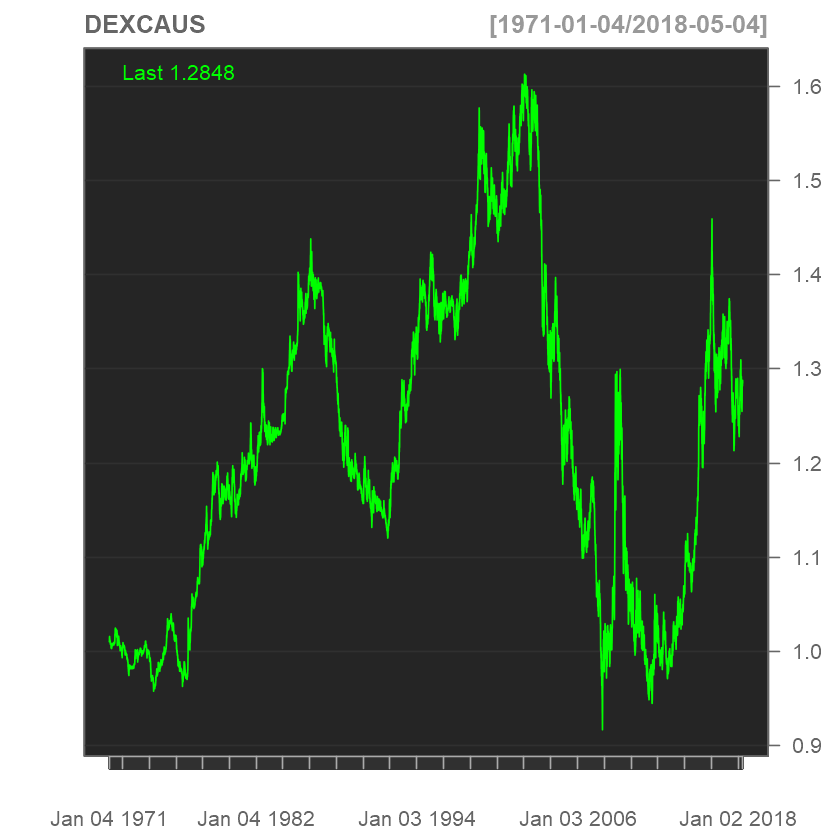

In [37]:
chartSeries(DEXCAUS)

## Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for Canada (NAEXKP01CAQ189S)

https://fred.stlouisfed.org/series/NAEXKP01CAQ189S

In [8]:
getSymbols('NAEXKP01CAQ189S',src='FRED')


[1] "NAEXKP01CAQ189S"

In [10]:
# check the structure of the datafram
str(NAEXKP01CAQ189S)

An 'xts' object on 1961-01-01/2017-10-01 containing:
  Data: num [1:228, 1] 7.90e+10 8.10e+10 8.30e+10 8.41e+10 8.63e+10 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "NAEXKP01CAQ189S"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
List of 2
 $ src    : chr "FRED"
 $ updated: POSIXct[1:1], format: "2018-05-10 21:07:01"


           NAEXKP01CAQ189S
1961-01-01     79010500000
1961-04-01     80997500000
1961-07-01     82954000000
1961-10-01     84115250000
1962-01-01     86342500000
1962-04-01     86970000000

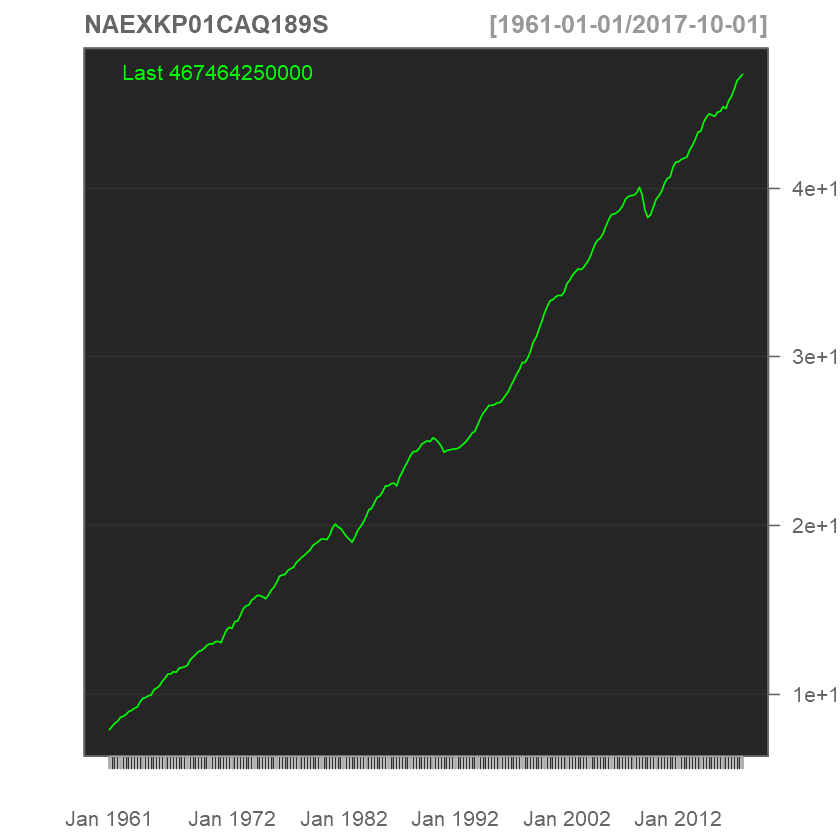

In [38]:
head(NAEXKP01CAQ189S)
chartSeries(NAEXKP01CAQ189S)

## Long-Term Government Bond Yields: 10-year: Main (Including Benchmark) for Canada (IRLTLT01CAM156N)

[IRLTLT01CAM156N](https://fred.stlouisfed.org/series/IRLTLT01CAM156N)



In [6]:
getSymbols('IRLTLT01CAM156N',src='FRED')


[1] "IRLTLT01CAM156N"

In [7]:
head(IRLTLT01CAM156N)

           IRLTLT01CAM156N
1960-01-01            5.54
1960-02-01            5.46
1960-03-01            5.39
1960-04-01            5.29
1960-05-01            5.21
1960-06-01            5.07

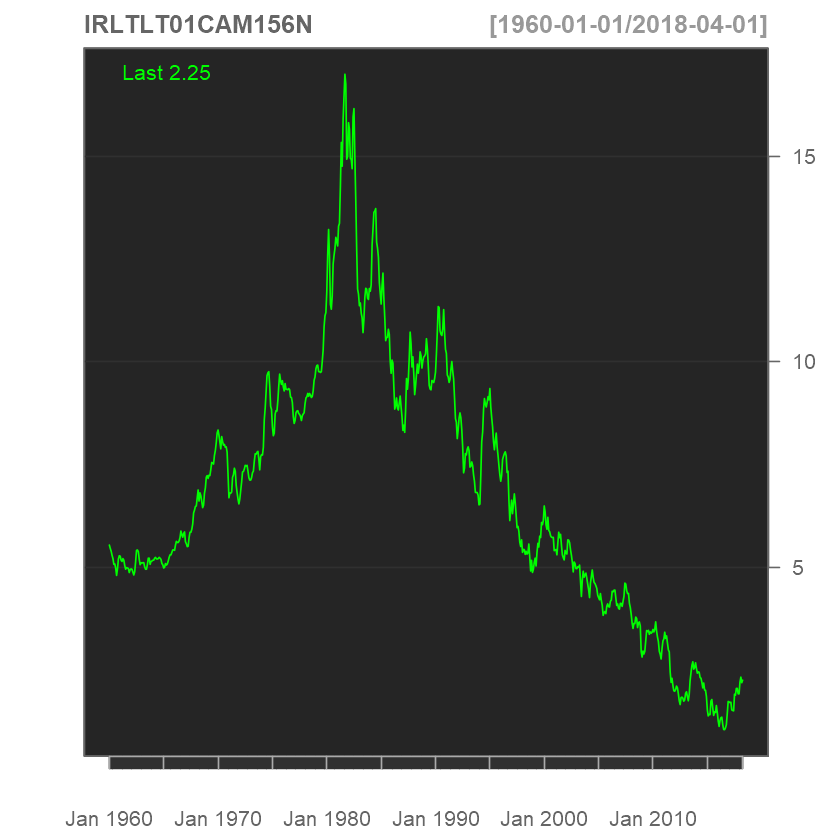

In [39]:
chartSeries(IRLTLT01CAM156N)

### Other Data Source
`quantmod` also provides options to retrive data from other sources such as Oanda, World Bank, YAHOO, and GOOGLE

In [12]:
getSymbols('USD/CNY', src = 'oanda', from = '2013-10-10')

Warning message in getSymbols.oanda(Symbols = "USD/CNY", env = <environment>, verbose = FALSE, :
"Oanda only provides historical data for the past 180 days. Symbol: USD/CNY"

[1] "USDCNY"

            USD.CNY
2017-11-11 6.641350
2017-11-12 6.639844
2017-11-13 6.637309
2017-11-14 6.638352
2017-11-15 6.626908
2017-11-16 6.631551

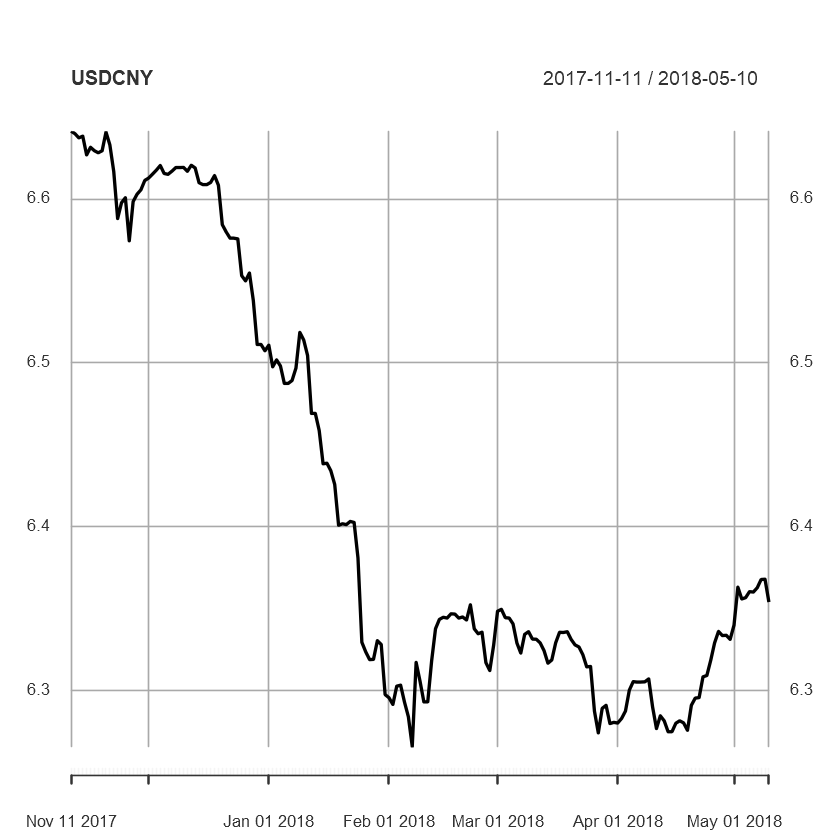

In [13]:
head(USDCNY)
plot(USDCNY)

In [14]:
# auto.assign = TRUE, or just getFX() 
getMetals(Metals = 'gold', base.currency = 'CNY', from = '2013-10-10')

Warning message in getSymbols.oanda(Symbols = metals, from = from, to = to, auto.assign = auto.assign, :
"Oanda only provides historical data for the past 180 days. Symbol: XAU/CNY"

[1] "XAUCNY"

            XAU.CNY
2017-11-11 8474.026
2017-11-12 8471.968
2017-11-13 8479.812
2017-11-14 8478.688
2017-11-15 8492.851
2017-11-16 8478.313

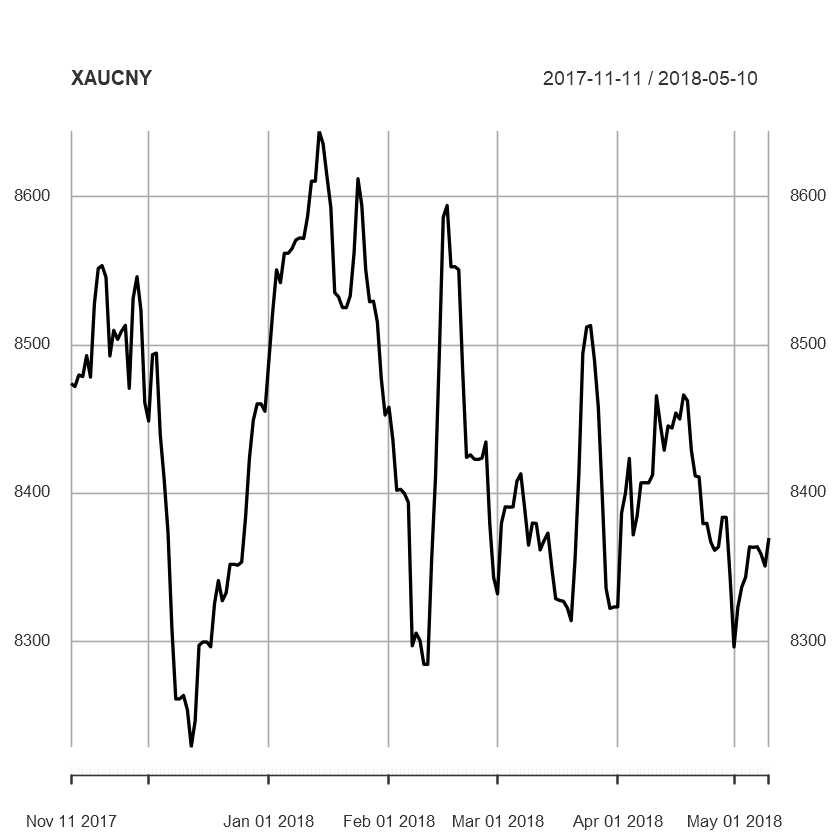

In [15]:
head(XAUCNY)
plot(XAUCNY)

## pdfetch

https://rdrr.io/cran/pdfetch/

In [22]:
install.packages("pdfetch", repos = "http://cran.rstudio.com")

package 'pdfetch' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\RtmpcBBZ51\downloaded_packages


In [24]:
packageDescription('pdfetch', 
                   fields = c('Package', 'Version', 'Author', 'Description'))

Package: pdfetch
Version: 0.2.3
Author: Abiel Reinhart <abielr@gmail.com>
Description: Download economic and financial time series from public
        sources, including the St Louis Fed's FRED system, Yahoo
        Finance, the US Bureau of Labor Statistics, the US Energy
        Information Administration, the World Bank, Eurostat, the
        European Central Bank, the Bank of England, the UK's Office of
        National Statistics, Deutsche Bundesbank, and INSEE.

-- File: C:/Users/oldyu/Documents/R/R-3.4.2/library/pdfetch/Meta/package.rds 
-- Fields read: Package, Version, Author, Description

In [26]:
library(pdfetch)

Warning message:
"package 'pdfetch' was built under R version 3.4.4"


### FRED


https://rdrr.io/cran/pdfetch/man/pdfetch_FRED.html

Real Gross Domestic Product (GDPC1)

Real Personal Consumption Expenditures (PCECC96)


               GDPC1   PCECC96
1947-03-31  1934.471  1199.413
1947-06-30  1932.281  1219.329
1947-09-30  1930.315  1223.266
1947-12-31  1960.705  1223.649
1948-03-31  1989.535  1229.757
1948-06-30  2021.851  1244.060
1948-09-30  2033.155  1245.894
1948-12-31  2035.329  1255.835
1949-03-31  2007.522  1257.870
1949-06-30  2000.788  1277.136
1949-09-30  2022.798  1280.030
1949-12-31  2004.653  1298.778
1950-03-31  2084.559  1320.391
1950-06-30  2147.592  1342.114
1950-09-30  2230.362  1410.954
1950-12-31  2273.435  1368.416
1951-03-31  2304.542  1401.484
1951-06-30  2344.517  1361.885
1951-09-30  2392.808  1377.727
1951-12-31  2398.105  1385.761
1952-03-31  2423.457  1388.853
1952-06-30  2428.516  1416.125
1952-09-30  2446.081  1423.010
1952-12-31  2526.359  1473.263
1953-03-31  2573.372  1490.814
1953-06-30  2593.456  1499.827
1953-09-30  2578.922  1496.320
1953-12-31  2539.786  1486.391
1954-03-31  2528.043  1491.828
1954-06-30  2530.689  1511.285
1954-09-30  2559.397  1531.792
1954-12-

In [29]:
myData = pdfetch_FRED(c("GDPC1", "PCECC96"))

In [30]:
# an xts object
str(myData)

An 'xts' object on 1947-03-31/2018-03-31 containing:
  Data: num [1:285, 1:2] 1934 1932 1930 1961 1990 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:2] "GDPC1" "PCECC96"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [32]:
head(myData)

              GDPC1  PCECC96
1947-03-31 1934.471 1199.413
1947-06-30 1932.281 1219.329
1947-09-30 1930.315 1223.266
1947-12-31 1960.705 1223.649
1948-03-31 1989.535 1229.757
1948-06-30 2021.851 1244.060

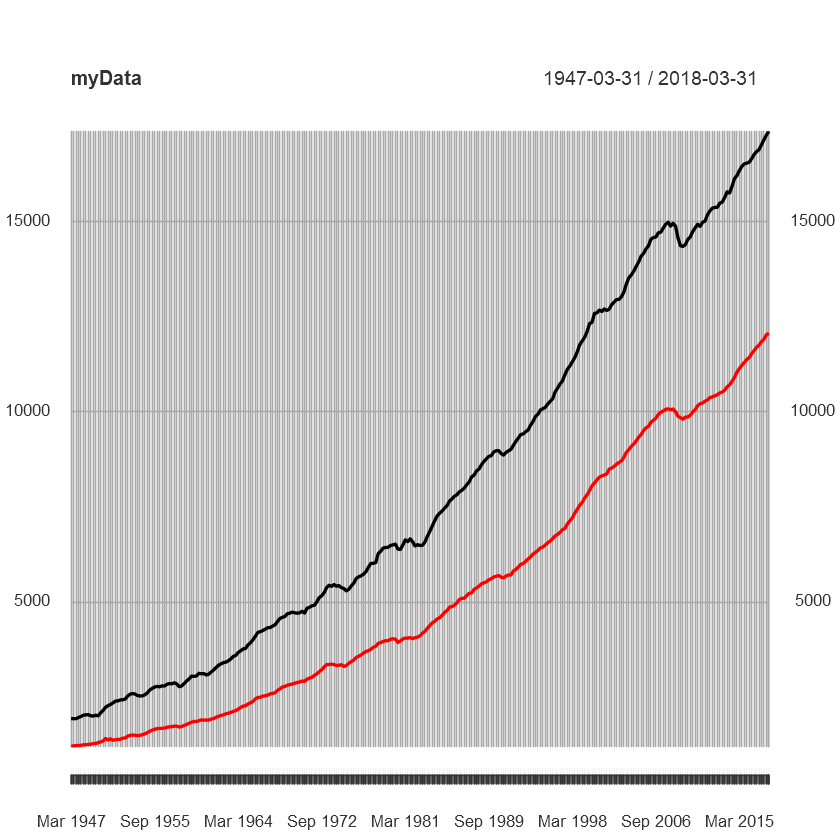

In [31]:
plot(myData)

### World Bank 

#### Description
Fetch data from World Bank

#### Usage

pdfetch_WB(indicators, countries = "all")

#### Arguments
indicators: a vector of World Bank indicators

countries： a vector of countrie identifiers, which can be 2- or 3-character ISO codes. The special option "all" retrieves all countries.

In [34]:
myData = pdfetch_WB("NY.GDP.MKTP.CD", c("BR","MX"))

In [36]:
head(myData)

           NY.GDP.MKTP.CD.BR NY.GDP.MKTP.CD.MX
1960-12-31       15165569913       13056168000
1961-12-31       15236854859       14153952000
1962-12-31       19926293839       15221056000
1963-12-31       23021477292       16936336000
1964-12-31       21211892260       20070136000
1965-12-31       21790035117       21829712000

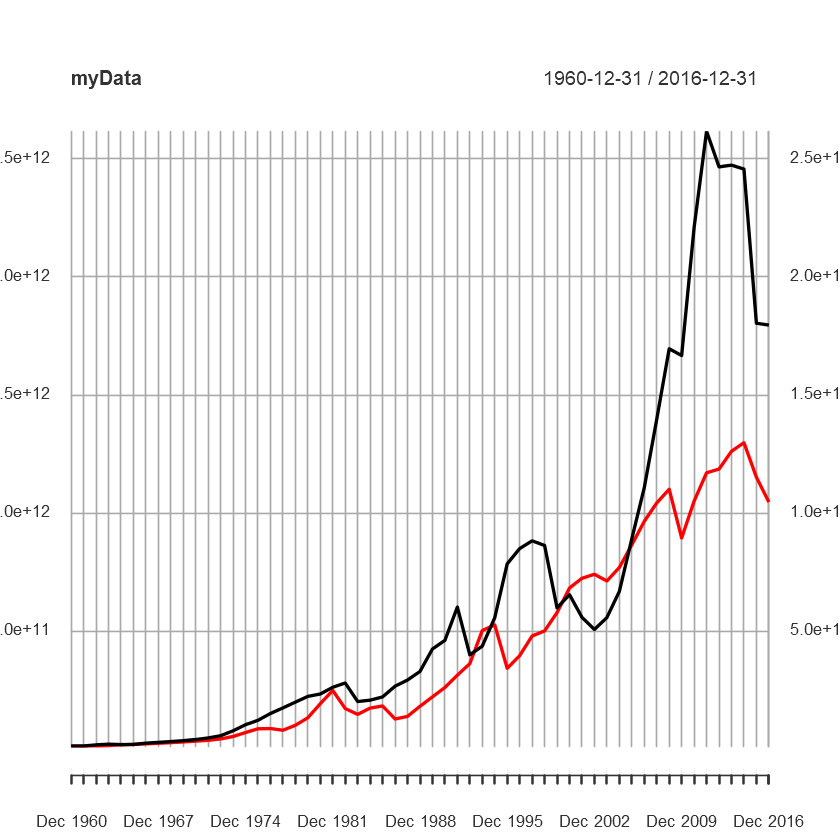

In [35]:
plot(myData)

### Data from World Bank
Package WDI (world development indicators) used to fetch data from WDI. Here we want to fetch annual data of the ratio of listed companies’ market capitalization to GDP from year 2000 to 2012 in China, USA, GB, JP and IN.

In [18]:
install.packages("WDI", repos = "http://cran.rstudio.com")
require('WDI')
WDIsearch(string = 'market capitalization')

also installing the dependency 'RJSONIO'



package 'RJSONIO' successfully unpacked and MD5 sums checked
package 'WDI' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\oldyu\AppData\Local\Temp\RtmpcBBZ51\downloaded_packages


Loading required package: WDI
Warning message:
"package 'WDI' was built under R version 3.4.4"Loading required package: RJSONIO


indicator,name
GFDD.DM.01,Stock market capitalization to GDP (%)
GFDD.AM.02,Market capitalization excluding top 10 companies to total market capitalization (%)
CM.MKT.LCAP.GD.ZS,Market capitalization of listed domestic companies (% of GDP)
CM.MKT.LCAP.CD,Market capitalization of listed domestic companies (current US$)


Now we know the series ID is “CM.MKT.LCAP.GD.ZS”. We can also search series IdD in < http://data.worldbank.org/indicator>.

In [19]:
mc <- WDI(indicator = 'CM.MKT.LCAP.GD.ZS',
          country = c('CN', 'US', 'GB', 'JP', 'IN'),
          start = 2000, end = 2012)
mc[mc$iso2c == 'CN', ]

iso2c,country,CM.MKT.LCAP.GD.ZS,year
CN,China,43.19088,2012
CN,China,45.05888,2011
CN,China,66.02345,2010
CN,China,69.92534,2009
CN,China,38.68430,2008
CN,China,126.08774,2007
CN,China,41.62064,2006
CN,China,17.57910,2005
CN,China,22.89723,2004
CN,China,30.89698,2003
